In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
Largo = 0.1
Diametro = 0.012
Tizq = 80
Tder = 30
Tinicial = 30
c = 900
k = 200
densidad = 2700
intervalo_temp = 0.1

In [3]:
Numero_de_elementos = 4
Largo_elemento = Largo/Numero_de_elementos
tiempo_limite = 5000



Numero_de_Nodos = Numero_de_elementos+1

temperatura = np.ones((Numero_de_Nodos)) * Tinicial
temperatura[0] = Tizq
Matriz_rigidez = np.zeros((Numero_de_Nodos,Numero_de_Nodos)) 
Matriz_conductancia = np.zeros((Numero_de_Nodos,Numero_de_Nodos)) 

In [4]:
S = np.array([0,Numero_de_Nodos-1])
R = np.arange(1,Numero_de_Nodos-1)
print(R,S)

[1 2 3] [0 4]


In [5]:
for i in range(Numero_de_elementos):
    
    p = i
    j = i+1
    
    #matriz de conductancia ('masa concentrada')
    Matriz_cond = (densidad*c*Largo_elemento/6) * np.array([
                                            [2,1],
                                            [1,2]     ])
    
    #Matriz de rigidez
                   
    Matriz_local = (k/Largo_elemento) * np.array([
                                    [1 ,-1],
                                    [-1, 1]    ])
    

    A_G = np.array([p,p+1],dtype = int)
    B_G = np.array([j,j+1],dtype = int) 
    A_L = np.array([0,1],dtype = int)

    
    Matriz_rigidez[np.ix_(A_G,A_G)] +=  Matriz_local [np.ix_(A_L,A_L)]
    Matriz_conductancia[np.ix_(A_G,A_G)] +=  Matriz_cond [np.ix_(A_L,A_L)]


In [6]:
Evolucion = []
tiempo = 0
Matriz_conductancia_inv = np.linalg.inv(Matriz_conductancia[np.ix_(R,R)])
cuenta = 0
diferencias = []


while tiempo < tiempo_limite:
    
    tiempo += intervalo_temp
    
    intermedio = (np.dot(Matriz_rigidez[np.ix_(R,R)],temperatura[R]) + np.dot(Matriz_rigidez[np.ix_(R,S)],temperatura[S]))
    temp_siguiente =  temperatura[R] - np.dot(Matriz_conductancia_inv,intermedio) * intervalo_temp  

    
    temp_siguiente = np.append(np.array([Tizq]),temp_siguiente) 
    temp_siguiente = np.append(temp_siguiente ,np.array([Tder]))

    
    
    
    
    intermedio2 = (temp_siguiente - temperatura)/intervalo_temp
    intermedio3 = np.dot(Matriz_rigidez,temperatura)
    intermedio4 = np.dot(Matriz_conductancia,intermedio2)#.reshape(-1,1))   
    flujo = intermedio3 + intermedio4
    diferencia = (abs(flujo[0]) - abs(flujo[-1]))
    diferencias.append(diferencia)    
    temperatura = copy.copy(temp_siguiente)  
    if diferencia < 0.5 :
        break

    

    
    Evolucion.append(temp_siguiente)

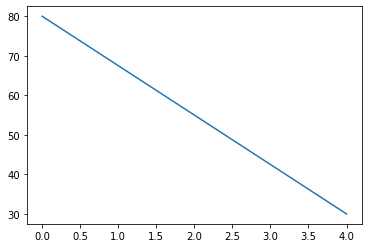

In [7]:
plt.plot(temperatura)
plt.show()
    

In [8]:
print(cuenta)

0


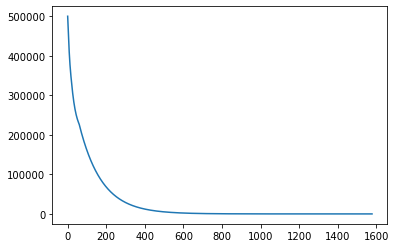

In [9]:
plt.plot(diferencias)